# Face Detection and Spatial Transformations
__Author__ : Mohammad Rouintan , 400222042

__Course__ : Undergraduate Digital Image Processing Course

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

### With OpenCv

In [3]:
def face_detection(path):
    # haar cascade
    cascade_path = 'haarcascade_frontalface_default.xml'
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + cascade_path)

    # Read image and convert to grayscale image
    image = cv2.imread(path)
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Detect faces in the image
    faces = face_cascade.detectMultiScale(
        gray_image,
        scaleFactor=1.2,
        minNeighbors=5,
        minSize=(100, 100),
        flags = cv2.CASCADE_SCALE_IMAGE
    )

    # Draw a rectangle around the faces
    for (x, y, w, h) in faces:
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

    plt.figure(figsize=(20, 10))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.show()

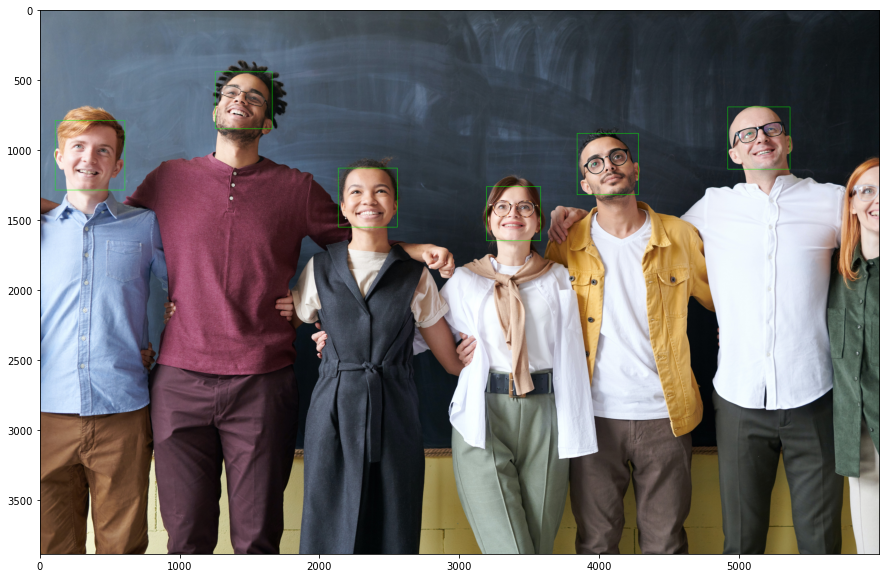

In [4]:
face_detection('Images/image1.jpg')

### Spatial Transformations

In [20]:
def face_detection(path):
    # haar cascade
    cascade_path = 'haarcascade_frontalface_default.xml'
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + cascade_path)

    # Read image and convert to grayscale image
    image = cv2.imread(path)
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Detect faces in the image
    faces = face_cascade.detectMultiScale(
        gray_image,
        scaleFactor=1.2,
        minNeighbors=5,
        minSize=(100, 100),
        flags = cv2.CASCADE_SCALE_IMAGE
    )

    return faces

##### Mirroring

In [62]:
def Mirroring(path, faces):
    image = cv2.imread(path)
    for (x, y, w, h) in faces:
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
        for i in range(y, y + h):
            for j in range(x, x + w // 2):
                image[i, j], image[i, w + x - (j - x) - 1] = image[i, w + x - (j - x) - 1], image[i, j]
                
    
    plt.figure(figsize=(20, 10))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.show()

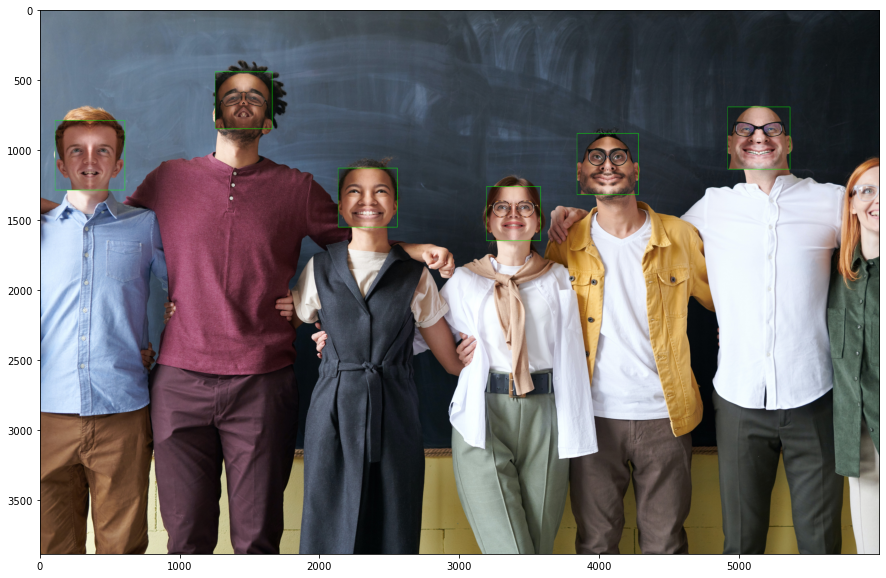

In [63]:
Mirroring('Images/image1.jpg', face_detection('Images/image1.jpg'))

##### Reverse

In [100]:
def Reverse(path, faces):
    image = cv2.imread(path)

    for (x, y, w, h) in faces:
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
        for i in range(y, y + h):
            for j in range(x, x + w // 2):
                temp = image[i, j].copy()
                image[i, j] = image[i, w + x - (j - x) - 1]
                image[i, w + x - (j - x) - 1] = temp
    
    
    plt.figure(figsize=(20, 10))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.show()

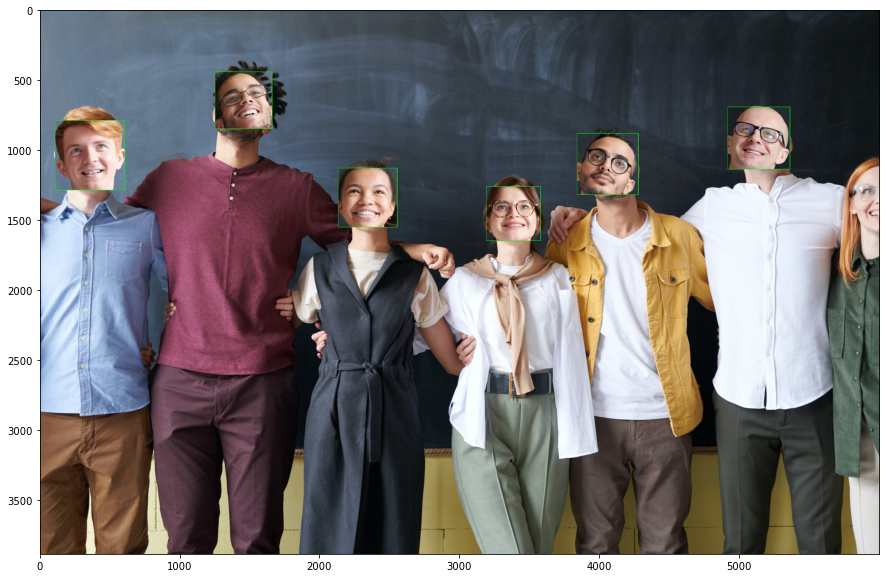

In [101]:
Reverse('Images/image1.jpg', face_detection('Images/image1.jpg'))

In [124]:
def rotate(image, degree):
    rads = np.radians(degree)
    rot_img = np.uint8(np.zeros(image.shape))

    height = rot_img.shape[0]
    width  = rot_img.shape[1]

    midx, midy = (width // 2, height // 2)

    for i in range(rot_img.shape[0]):
        for j in range(rot_img.shape[1]):
            x = (i - midx) * np.cos(rads) + (j - midy) * np.sin(rads)
            y = -(i - midx) * np.sin(rads) + (j - midy) * np.cos(rads)

            x = round(x) + midx 
            y = round(y) + midy 

            if x >= 0 and y >= 0 and x < image.shape[0] and  y < image.shape[1]:
                rot_img[i, j, :] = image[x, y, :]

    return rot_img 

In [125]:
def Rotate(path, faces):
    image = cv2.imread(path)
    image_copy = image.copy()

    for (x, y, w, h) in faces:
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
        image[y:y + h, x:x + w] = rotate(image[y:y + h, x:x + w], 45)

    
    plt.figure(figsize=(20, 10))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.show()

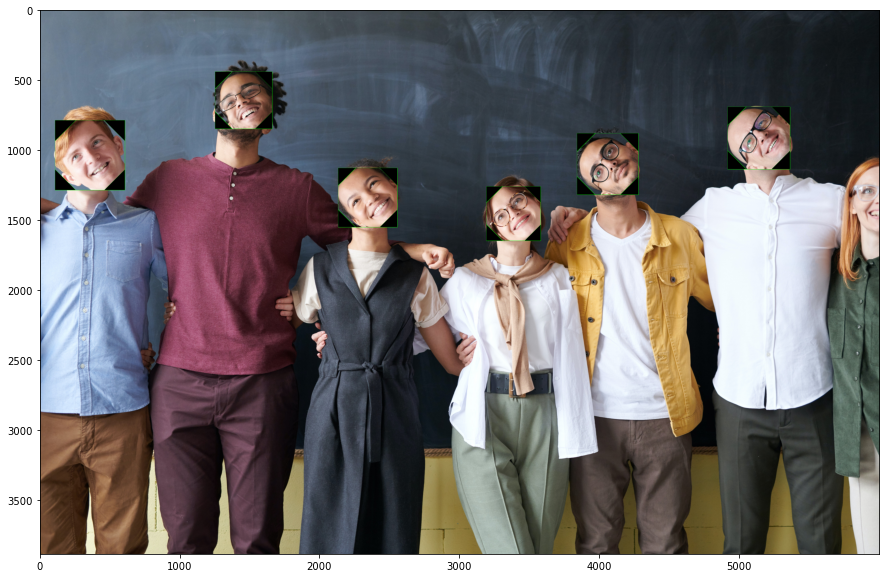

In [126]:
Rotate('Images/image1.jpg', face_detection('Images/image1.jpg'))